In [1]:
from regression import*

Using TensorFlow backend.


# Data

In [2]:
# Synthetic Training Data 
data_synth_dict = load_dataset('synth_00', as_dict=True)
data_synth_raw = DATA( data_synth_dict['vind'][:,50:], data_synth_dict['distance'][:,50:]) 

In [3]:
# Processing
win_size, step = 20, 5
data_synth_sgm = data_synth_raw.segment(win_size, step, as_df=True)    
# data_synth_sgm = data_synth_raw.MinMax().segment(win_size, step, as_df=True)    

In [4]:
exp_reg = setup(data_synth_sgm,
                train_size = .6,
                target = 'target', 
                # normalize = True, 
                silent = True,
                session_id = 10
                )   


Setup Succesfully Completed!


In [19]:
compare_models()

In [5]:
model = tune_model('xgboost')

IntProgress(value=0, description='Processing: ', max=16)

Initiated  . . . . . . . . . . . . . . . . . .                12:21:55
Status     . . . . . . . . . . . . . . . . . .  Tuning Hyperparameters
ETC        . . . . . . . . . . . . . . . . . .         Calculating ETC

Empty DataFrame
Columns: [MAE, MSE, RMSE, R2, RMSLE, MAPE]
Index: []

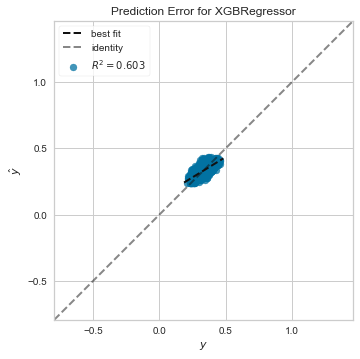

In [21]:
plot_model(model, plot='error')

In [22]:
pred = predict_model(model) 

Model     MAE     MSE    RMSE     R2   RMSLE  \
0  Extreme Gradient Boosting Regressor  0.0143  0.0003  0.0185  0.603  0.0139   

     MAPE  
0  0.0435

In [ ]:
def predict(x, y, win_size, step, doPlot=False, window_length=11):
    x_segmented = [ x[t:t+win_size] for t in range(0, len(y)-win_size, 1)]
    y_segmented = y[win_size:]
    data_n_df = pd.DataFrame( np.concatenate([x_segmented, np.reshape(y_segmented,(-1,1))], axis=1) )
    data_n_df.columns = [*['feature_'+str(i) for i in range(win_size)], 'target']

    prediction = predict_model(model, data=data_n_df)
    y_true = prediction.target
    y_pred = prediction.Label
    y_pred = signal.savgol_filter( y_pred, window_length=window_length, polyorder=1)  

    metrics = dict(
        r2 = r2_score(y_true, y_pred),
        mse = mean_squared_error(y_true, y_pred))

    if doPlot:
        plt.plot(y_true, label='True Value')
        plt.plot(y_pred, label='Prediction')
        plt.legend()
        plt.show()
    
    return y_true, y_pred, metrics

In [ ]:
data_dict = load_dataset('arduino_02', as_dict=True)
data = DATA( data_dict['vind'], data_dict['distance']) 

In [ ]:
n = 6
y_true, y_pred, metrics = predict(data.X[n], data.Y[n], win_size, step, doPlot=True, window_length=3)

## Synthetic to Measurement Conversion

In [9]:
# Measured Data 
data_meas_dict = load_dataset('meas_00', as_dict=True)
data_meas = DATA( data_meas_dict['vind'], data_meas_dict['synth_vind']) 
# data_meas = DATA( data_meas_dict['synth_vind'], data_meas_dict['vind']) 
data_meas_train, data_meas_test = data_meas.split(.5)

In [753]:
X_train = np.reshape( list(itertools.chain.from_iterable(data_meas_train.X)), (-1,1))
Y_train = np.reshape( list(itertools.chain.from_iterable(data_meas_train.Y)), (-1,1))
regr = MLPRegressor(random_state=1, max_iter=1000, activation='relu', hidden_layer_sizes=(3)).fit(X_train, Y_train)
# regr.predict(X_test[:2])
# regr.score(X_test, y_test)

In [756]:
# n = 0

# x = np.reshape(data_meas_test.X[n], (-1,1))
# y = data_meas_test.Y[n]
# y_pred = reg.predict(x)


# plt.plot(y)
# plt.plot(y_pred)
# # plt.plot(x)


In [805]:
def foo(datset_name, n, save=False, delay=None):
    data_meas_dict = load_dataset(datset_name, as_dict=False)

    data = data_meas_dict[n]
    if delay is None: delay = get_delay(data.vind.values, data.synth_vind.values)
    vind = data.vind.values 

    if delay > 0: 
        data = data.iloc[delay:,:]
        data.vind = vind[:-delay]
    elif delay<0 :
        data = data.iloc[:delay,:]
        data.vind = vind[-delay:]

    # s = data.synth_vind - .7
    # m = data.vind

    # a = np.std(m)/np.std(s) 
    # b = np.mean(m) - np.mean(s) * a

    # plt.plot( a*s+b )
    # plt.plot( m )
    # plt.show()
 
    # plt.plot( (s-np.mean(s))/(np.std(s)+eps) )
    # plt.plot( (m-np.mean(m))/(np.std(m)+eps) )

    if save:        
        dataset_folder_path = get_dataset_folder_path('arduino_00')
        N = len(os.listdir(dataset_folder_path))
        data.to_csv(dataset_folder_path+'/record_'+"{0:0=2d}".format(N)+'.csv', index=None) 
    return data

1.192240586797388 0.10740641947590857


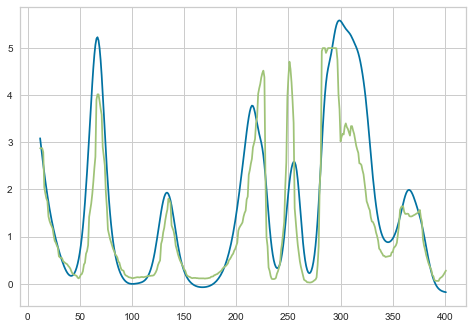

In [838]:
data = foo('arduino_00', 1, save=False)
s = data.synth_vind/1.5 - .7
m = data.vind 

a = np.std(s)/np.std(m) 
b =  np.mean(s)  - a* np.mean(m) 
m_ = a*m + b
print(a,b)

plt.plot( s )
plt.plot( m )
# plt.plot( m )


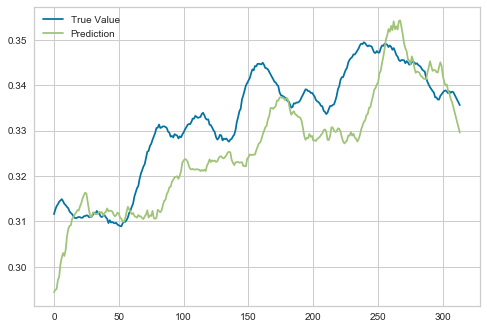

0.0146484375 2.7587890625


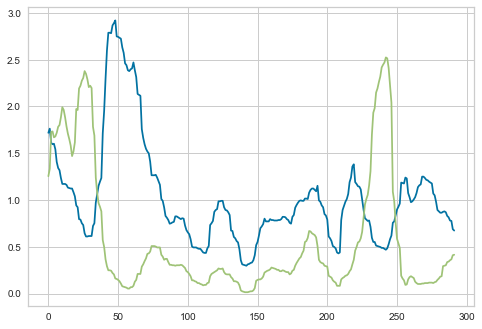

In [57]:
n = 2
feat = 'vind'
c1 = data_dict[feat][n]
c2 = data_dict[feat][n+1]
d = abs(c1-c2)
print(min(d), max(d))

plt.plot(c1)
plt.plot(c2)

In [32]:
from data import

# RNN

In [29]:
regressor = RNN(
    win_size = 40,
    step = 10,
    Nhiddenlayer = 20,
    Nunits = 50, 
    activation = 'tanh'
)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 40, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 40, 50)            20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 40, 50)            20200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 40, 50)            20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 40, 50)            20200     
_________________________________________________________________
lstm_6 (LSTM)                (None, 40, 50)            20200     
_________________________________________________________________
lstm_7 (LSTM)                (None, 40, 50)           

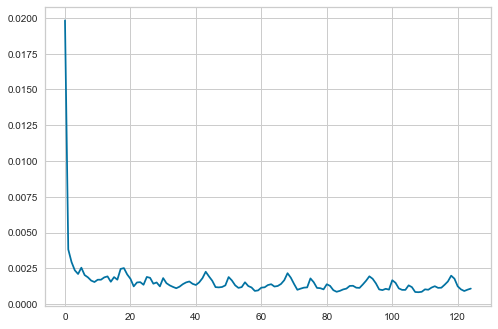

In [30]:
loss = regressor.train( data_synth, epochs=5 )

In [32]:
y_true = data_synth.Y[:5]
y_pred = regressor.predict(data_synth.X[:5,:])

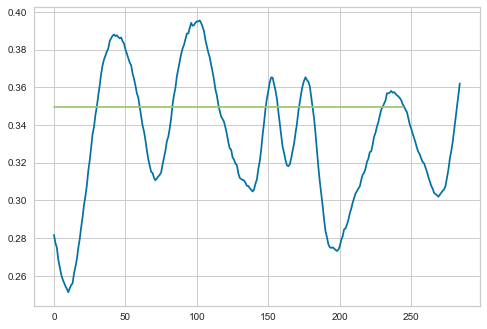

In [33]:
idx = 2
plt.plot(y_true[idx])
plt.plot(y_pred[idx])

In [35]:
idx = 2
data = data_meas

x, y = data.X[idx], data.Y[idx]
x = np.reshape(x, (1, np.shape(x)[0], np.shape(x)[1]))
y = np.reshape(y, (1, np.shape(y)[0]))

y_pred_ = regressor.predict(x)
smoothed_predictions = signal.savgol_filter( predictions[0], window_length=11, polyorder=1, axis=0)       

plt.plot(y[0,regressor.win_size:])
plt.plot(predictions[0])
plt.plot(smoothed_predictions)
plt.show()

In [ ]:
# def foo(datset_name, n, save=False, delay=None):
#     data_meas_dict = load_dataset(datset_name, as_dict=False)

#     data = data_meas_dict[n]
#     if delay is None: delay = get_delay(data.vind.values, data.synth_vind.values)
#     vind = data.vind.values

#     if delay > 0: 
#         data = data.iloc[delay:,:]
#         data.vind = vind[:-delay]
#     elif delay<0 :
#         data = data.iloc[:delay,:]
#         data.vind = vind[-delay:]

#     s = data.synth_vind
#     m = data.vind

#     # a = np.std(s) / np.std(m)
#     # b = np.mean(s) - np.mean(m)*a

#     # plt.plot( s )
#     # plt.plot( a*m + b )

#     plt.plot( (s-np.mean(s))/(np.std(s)+eps) )
#     plt.plot( (m-np.mean(m))/(np.std(m)+eps) )
#     print(delay)

#     if save:        
#         dataset_folder_path = get_dataset_folder_path('arduino_00')
#         N = len(os.listdir(dataset_folder_path))
#         data.to_csv(dataset_folder_path+'/record_'+"{0:0=2d}".format(N)+'.csv', index=None) 
#     return